# (Google colab only) Install the packacges needed locally

In [1]:
install.packages('tidyverse')
install.packages('ggplot2')
install.packages("hakaiApi")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
#import libray for generating the figure
library(ggplot2)
library(dplyr)

ERROR: ignored

## Get Hakai Authorization to retrieve data
If requested, click on the present link to retrieve an authorization token:

https://hecate.hakai.org/api-client-login

In [3]:
# Get Hakai Data
# Initialize the client
client <- hakaiApi::Client$new()


Copy and past your credentials from the login page:
token_type=Bearer&access_token=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6IjExNjMxNzQzNDYzMTA5NzUwOTczOSIsImVtYWlsIjoiamVzc3kuYmFycmV0dGVAaGFrYWkub3JnIiwidmVyaWZpZWRfZW1haWwiOnRydWUsIm5hbWUiOiJKZXNzeSBCYXJyZXR0ZSIsImdpdmVuX25hbWUiOiJKZXNzeSIsImZhbWlseV9uYW1lIjoiQmFycmV0dGUiLCJsaW5rIjoiaHR0cHM6Ly9wbHVzLmdvb2dsZS5jb20vMTE2MzE3NDM0NjMxMDk3NTA5NzM5IiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FHTm15eFlDTkEyVDl1ZUZWMDJpeTJ0am9RM2tGNmRUanVkSG1hcHlVWS15PXM5Ni1jIiwibG9jYWxlIjoiZW4iLCJoZCI6Imhha2FpLm9yZyIsImdyb3VwcyI6WyJqZXNzeS5iYXJyZXR0ZUBoYWthaS5vcmciLCJjaW9vcy5wYWNpZmljQGhha2FpLm9yZyIsImRhdGEubW9iaWxpemF0aW9uQGhha2FpLm9yZyIsImVpbXMuYXV0aC5oYWthaUBoYWthaS5vcmciLCJlaW1zLmF1dGgubmF0dXJlLnRydXN0QGhha2FpLm9yZyIsImVpbXMuYXV0aC5wYXJrcy5jYW5hZGFAaGFrYWkub3JnIiwiZWltcy5hdXRoLnNmY0BoYWthaS5vcmciLCJlaW1zLmF1dGgudXd0QGhha2FpLm9yZyIsImVpbXMuaW5zdHJ1bWVudGF0aW9uQGhha2FpLm9yZyIsImVpbXMub2NlYW5vZ3JhcGh5LmVkaXRvcnNAaGFrYWkub3JnIiwiZWlt

## Download data
We will download the ctd data for:

- work_area = QUADRA
- station = QU39
- start_dt > 2022-01-01
- start_dt < 2023-06-01
- direction_flag = d (downcast only)
- limit=-1 (all the data)

In [4]:
# This url will retrieval all the processed CTD data from the Skeena Fisheries 
url = "https://hecate.hakai.org/api/ctd/views/file/cast/data?work_area=QUADRA&station=QU39&start_dt>2022-01-01&start_dt<2023-01-01&limit=-1&direction_flag=d"

# Request some data (request chlorophyll data here)
data <- client$get(url)

# View out the data
View(data)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  hakai_id = col_character(),
  filename = col_character(),
  device_model = col_character(),
  device_firmware = col_character(),
  file_processing_stage = col_character(),
  work_area = col_character(),
  organization = col_character(),
  shutoff = col_character(),
  i_ext01 = col_logical(),
  cast_processing_stage = col_character(),
  process_log = col_character(),
  cruise = col_character(),
  station = col_character(),
  status = col_logical(),
  location_flag = col_logical(),
  process_flag = col_logical(),
  start_dt = col_datetime(format = ""),
  bottom_dt = col_datetime(format = ""),
  end_dt = col_datetime(format = ""),
  vessel = col_character()
  # ... with 43 more columns
)
ℹ Use `spec()` for the full column specifications.



ctd_file_pk,ctd_cast_pk,hakai_id,ctd_data_pk,filename,device_model,device_sn,device_firmware,file_processing_stage,work_area,⋯,cdom_ppb_flag_level_1,bin_stats,cast_type,sensors_submerged,water_depth_m,soak_start,soak_end,weather.sky_cover,weather.wind_speed,weather.swell_height
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>
7607,19268,1907674_2022-07-26T16:48:07Z,11065433,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065442,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065443,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065444,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065445,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065446,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065447,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065448,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7607,19268,1907674_2022-07-26T16:48:07Z,11065449,SBE19plus_01907674_2022_07_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0


## Filter data to a specific subset

In [11]:
# Filter subset and sort each profiles by depth
subset_data <- data %>% 
    filter(start_dt>'2022-10-01T00:00:00',start_dt<'2022-11-01T00:00:00') %>%
    group_by(station,hakai_id,start_dt) %>%
    arrange(depth)
subset_data

ctd_file_pk,ctd_cast_pk,hakai_id,ctd_data_pk,filename,device_model,device_sn,device_firmware,file_processing_stage,work_area,⋯,cdom_ppb_flag_level_1,bin_stats,cast_type,sensors_submerged,water_depth_m,soak_start,soak_end,weather.sky_cover,weather.wind_speed,weather.swell_height
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>
7807,20634,1907674_2022-10-11T16:52:02Z,11148334,SBE19plus_01907674_2022_10_11_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,6,0
7691,19540,1907674_2022-10-04T16:40:01Z,11148583,SBE19plus_01907674_2022_10_04_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,cloudy,3,0
7849,21012,1907674_2022-10-18T17:15:39Z,11157382,SBE19plus_01907674_2022_10_18_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,1,0
7972,22177,1907674_2022-10-26T17:11:13Z,11178648,SBE19plus_01907674_2022_10_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,overcast,6,0
7810,20640,211567_2022-10-11T17:10:52.250Z,11172746,211567_20221011_1317,RBRmaestro3,211567,1.144,1_datCnv,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,3,0
7807,20634,1907674_2022-10-11T16:52:02Z,11148335,SBE19plus_01907674_2022_10_11_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,6,0
7691,19540,1907674_2022-10-04T16:40:01Z,11148584,SBE19plus_01907674_2022_10_04_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,cloudy,3,0
7849,21012,1907674_2022-10-18T17:15:39Z,11157383,SBE19plus_01907674_2022_10_18_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,clear,1,0
7972,22177,1907674_2022-10-26T17:11:13Z,11178649,SBE19plus_01907674_2022_10_26_0001,SBE19plus,1907674,2.5.2,8_binAvg,QUADRA,⋯,2,NA,Dynamic,Full,NA,NA,NA,overcast,6,0


## Generate a plot

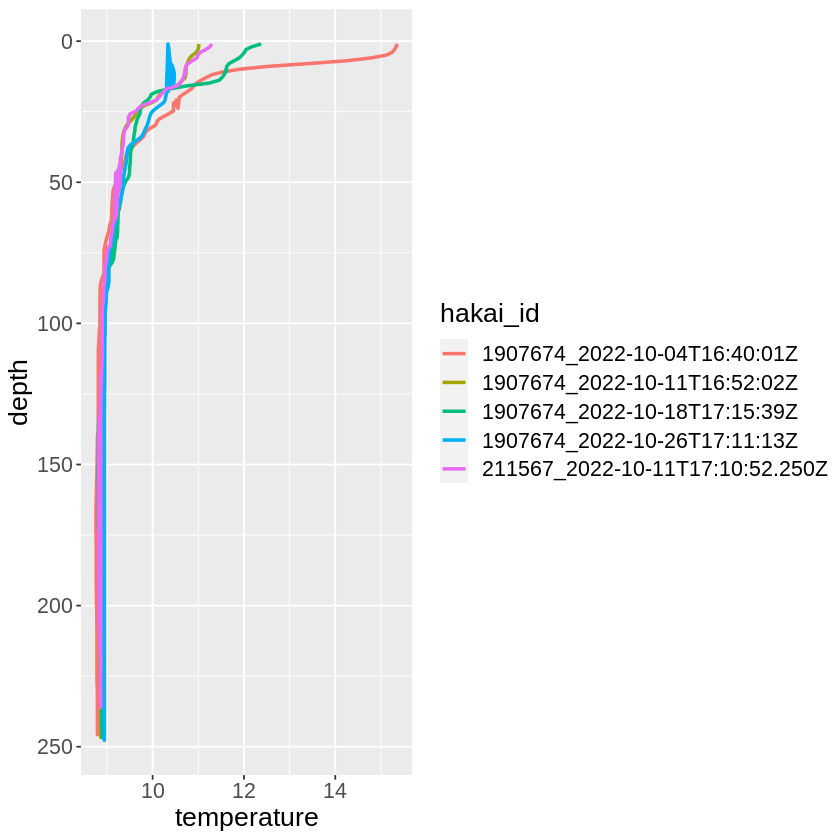

In [16]:
# Generate a plot of that subset for temperature
base <- ggplot(subset_data, aes(temperature, depth, colour = hakai_id)) + 
  geom_line(size=1) + 
  scale_y_reverse() +
  theme(text = element_text(size = 16))   

base

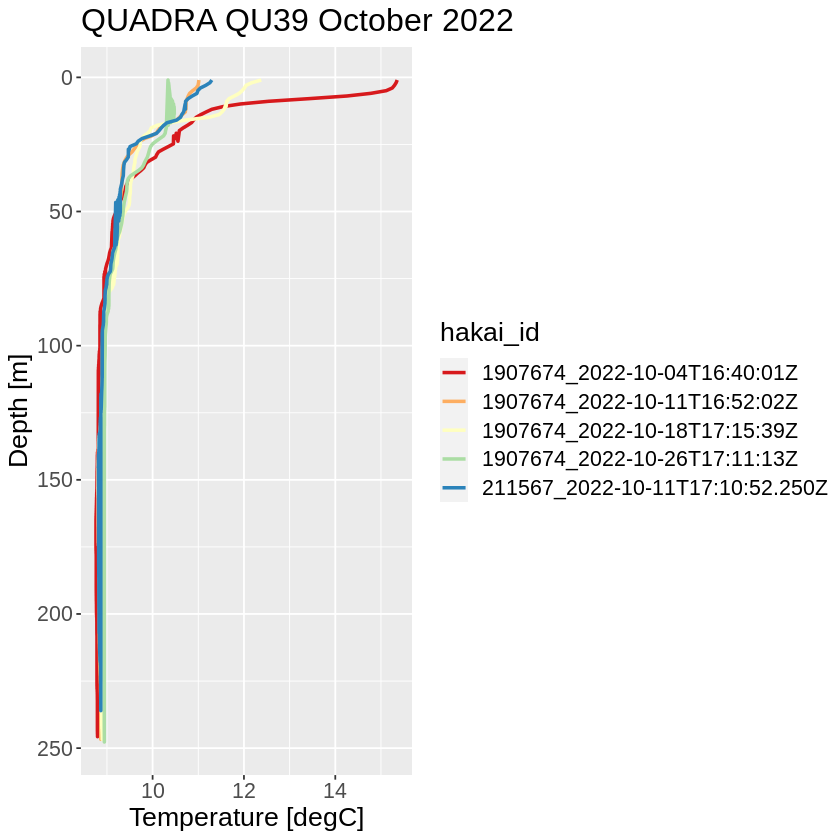

In [18]:
# Add labels
labelled <- base +
  labs(
    x = "Temperature [degC]",
    y = "Depth [m]",
    title = "QUADRA QU39 October 2022"
  ) +
  scale_colour_brewer(type = "seq", palette = "Spectral")
labelled

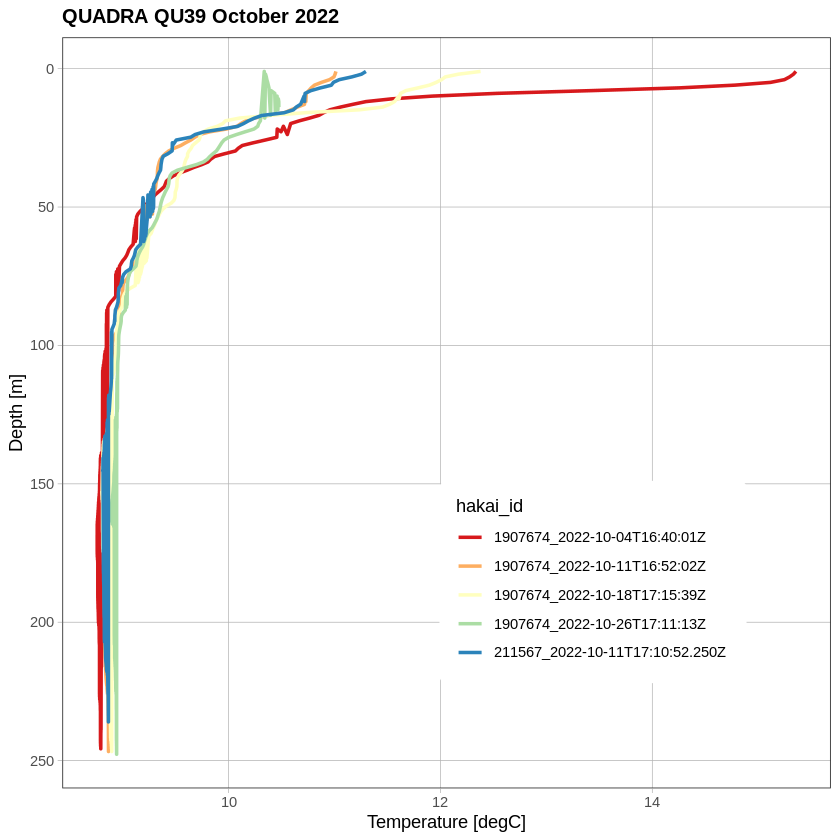

In [23]:
# Restyle the plot to look more like a paper 
# from https://ggplot2-book.org/polishing.html

styled <- labelled +
  theme_bw() + 
  theme(
    plot.title = element_text(face = "bold", size = 12),
    legend.background = element_rect(fill = "white", size = 4, colour = "white"),
    legend.justification = c(0, 1),
    legend.position = c(.5, .4),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.major = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank()
  )
styled

## Scatter plot of the whole QU39

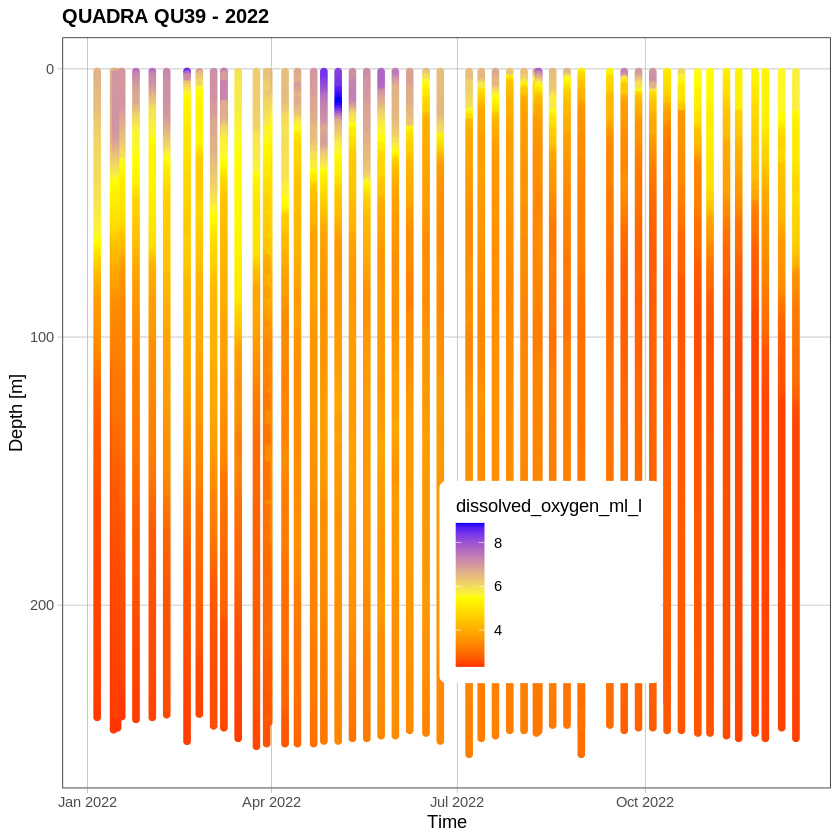

In [62]:
mid<-median(data$dissolved_oxygen_ml_l)

ggplot(data, aes(x=start_dt, y=depth, color=dissolved_oxygen_ml_l)) +
  geom_point() + 
  scale_y_reverse() +
  theme(text = element_text(size = 16))  +
  labs(
    x = "Time",
    y = "Depth [m]",
    title = "QUADRA QU39 - 2022"
  ) +
  scale_color_gradient2(midpoint=5.5, high="blue", mid="yellow",low="red", space ="Lab" )+
    theme_bw() + 
  theme(
    plot.title = element_text(face = "bold", size = 12),
    legend.background = element_rect(fill = "white", size = 4, colour = "white"),
    legend.justification = c(0, 1),
    legend.position = c(.5, .4),
    axis.ticks = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.major = element_line(colour = "grey70", linewidth = 0.2),
    panel.grid.minor = element_blank()
  )